In [ ]:
This notebook accompanies the following blog post:


In [96]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, coint, grangercausalitytests
PERIOD   = "5y"
INTERVAL = "1mo"

In [109]:
# 1. Get Major Stock Indices
indices = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^FTSE', '^N225', '^HSI', "HG=F", "GC=F"]  # S&P 500, Dow Jones, NASDAQ, Russell 2000, FTSE 100, Nikkei 225, Hang Seng
data = yf.download(indices, period=PERIOD, interval=INTERVAL)['Adj Close'][1:].fillna(method='ffill')

[*********************100%%**********************]  9 of 9 completed


In [110]:
data

,GC=F,HG=F,^DJI,^FTSE,^GSPC,^HSI,^IXIC,^N225,^RUT
Date,,,,,,,,,
2019-10-01,1511.400024,2.6330,27046.230469,7248.399902,3037.560059,26906.720703,8292.360352,22927.039062,1562.449951
2019-11-01,1465.599976,2.6420,28051.410156,7346.500000,3140.979980,26346.490234,8665.469727,23293.910156,1624.500000
2019-12-01,1465.599976,2.6420,28538.439453,7542.399902,3230.780029,28189.750000,8972.599609,23656.619141,1668.469971
2020-01-01,1582.900024,2.5200,28256.029297,7286.000000,3225.520020,26312.630859,9150.940430,23205.179688,1614.060059
2020-02-01,1564.099976,2.5460,25409.359375,6580.600098,2954.219971,26129.929688,8567.370117,21142.960938,1476.430054
2020-03-01,1564.099976,2.5460,21917.160156,5672.000000,2584.590088,23603.480469,7700.100098,18917.009766,1153.099976
2020-04-01,1684.199951,2.3540,24345.720703,5901.200195,2912.429932,24643.589844,8889.549805,20193.689453,1310.660034
2020-05-01,1736.900024,2.4265,25383.109375,6076.600098,3044.310059,22961.470703,9489.870117,21877.890625,1394.040039
2020-06-01,1793.000000,2.7135,25812.880859,6169.700195,3100.290039,24427.189453,10058.769531,22288.140625,1441.369995


In [113]:
# 2. Get Copper/Gold Futures Prices
data["COPPER/GOLD"] = data["HG=F"] / data["GC=F"]

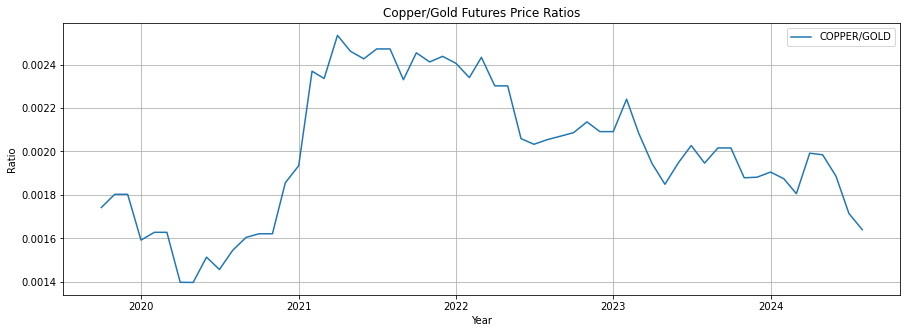

In [143]:
_ = plt.figure(figsize = (15, 5))
_ = plt.plot(data["COPPER/GOLD"], label = column)

_ = plt.legend()
_ = plt.xlabel("Year")
_ = plt.ylabel("Ratio")
_ = plt.title("Copper/Gold Futures Price Ratios")
_ = plt.grid()

In [115]:
adfuller(data["COPPER/GOLD"])

(-1.2982309847098086,
 0.6299812512000362,
 0,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 -716.593239060322)

In [116]:
adfuller(data["COPPER/GOLD"].diff().dropna())

(-4.35883956725636,
 0.00035078048270540757,
 1,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -698.2700784172589)

In [118]:
# 3. Conduct Augmented Dickey-Fuller (ADF) Test
def adf_test(series, significance_level=0.05):
    result = adfuller(series)
    return result[1] < significance_level  # return True if the series is stationary

first_diff_stationary_series = []
for column in data.columns:
    if not adf_test(data[column]):
        first_diff = data[column].diff().dropna()
        if adf_test(first_diff):
            first_diff_stationary_series.append(column)
first_diff_stationary_series

['GC=F',
 'HG=F',
 '^DJI',
 '^FTSE',
 '^GSPC',
 '^HSI',
 '^IXIC',
 '^N225',
 'COPPER/GOLD']

In [131]:
# 4. Perform Granger Cointegration Test on Stationary Series
cointegrated_pairs = []
non_cointegrated_pairs = []
for i in range(len(first_diff_stationary_series)):
    for j in range(i + 1, len(first_diff_stationary_series)):
        series1 = data[first_diff_stationary_series[i]]
        series2 = data[first_diff_stationary_series[j]]
        coint_pvalue = coint(series1.dropna(), series2.dropna())[1]
        print(coint_pvalue)
        if coint_pvalue < 0.05:  # Assuming 5% significance level for cointegration
            cointegrated_pairs.append((first_diff_stationary_series[i], first_diff_stationary_series[j]))
        else:
            non_cointegrated_pairs.append((first_diff_stationary_series[i], first_diff_stationary_series[j]))


0.8496075407241751
0.7459456629676205
0.7648710415174398
0.6676235486338995
0.3457446924421187
0.7373885570631439
0.03410869727809187
0.9533850903116667
0.20438276365932279
0.32518698411917774
0.4585915638020909
0.6063554754540543
0.38850393705079994
0.48331578215049875
0.8812468698495685
0.1624605701294351
0.09205436779892495
0.5291796443218146
0.3953674084546679
0.24957902778331104
0.9881539929286174
0.29042752094247326
0.2910333209756232
0.5832757168055606
0.41949902040253073
0.9568688665513361
0.6776397334504071
0.8505800254688105
0.46560107277775675
0.9623469222909029
0.7670791346867728
0.5636694229616643
0.8114342069994609
0.49070062223782795
0.9004492372574682
0.9307600981894618


In [132]:
cointegrated_pairs

[('GC=F', '^N225')]

In [121]:
non_cointegrated_pairs

[('GC=F', 'HG=F'),
 ('GC=F', '^DJI'),
 ('GC=F', '^FTSE'),
 ('GC=F', '^GSPC'),
 ('GC=F', '^HSI'),
 ('GC=F', '^IXIC'),
 ('GC=F', 'COPPER/GOLD'),
 ('HG=F', '^DJI'),
 ('HG=F', '^FTSE'),
 ('HG=F', '^GSPC'),
 ('HG=F', '^HSI'),
 ('HG=F', '^IXIC'),
 ('HG=F', '^N225'),
 ('HG=F', 'COPPER/GOLD'),
 ('^DJI', '^FTSE'),
 ('^DJI', '^GSPC'),
 ('^DJI', '^HSI'),
 ('^DJI', '^IXIC'),
 ('^DJI', '^N225'),
 ('^DJI', 'COPPER/GOLD'),
 ('^FTSE', '^GSPC'),
 ('^FTSE', '^HSI'),
 ('^FTSE', '^IXIC'),
 ('^FTSE', '^N225'),
 ('^FTSE', 'COPPER/GOLD'),
 ('^GSPC', '^HSI'),
 ('^GSPC', '^IXIC'),
 ('^GSPC', '^N225'),
 ('^GSPC', 'COPPER/GOLD'),
 ('^HSI', '^IXIC'),
 ('^HSI', '^N225'),
 ('^HSI', 'COPPER/GOLD'),
 ('^IXIC', '^N225'),
 ('^IXIC', 'COPPER/GOLD'),
 ('^N225', 'COPPER/GOLD')]

In [130]:
# 5. Perform Granger Causality Test on Each Direction for Cointegrated Pairs
for pair in cointegrated_pairs:
    series1 = data[pair[0]]
    series2 = data[pair[1]]
    print("=======================================================")
    print(f'Granger Causality Test between {pair[0]} and {pair[1]}')
    print("=======================================================")
    print('Direction: {} causes {}'.format(pair[0], pair[1]))
    print("=======================================================")
    grangercausalitytests(pd.concat([series1, series2], axis=1).dropna(), maxlag=5, verbose=True)
    print("=======================================================")
    print('Direction: {} causes {}'.format(pair[1], pair[0]))
    print("=======================================================")
    grangercausalitytests(pd.concat([series2, series1], axis=1).dropna(), maxlag=5, verbose=True)
    print("=======================================================")
    print("\n")

Granger Causality Test between GC=F and ^N225
Direction: GC=F causes ^N225

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0908  , p=0.1539  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=2.2048  , p=0.1376  , df=1
likelihood ratio test: chi2=2.1639  , p=0.1413  , df=1
parameter F test:         F=2.0908  , p=0.1539  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6957  , p=0.1935  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=3.7174  , p=0.1559  , df=2
likelihood ratio test: chi2=3.6012  , p=0.1652  , df=2
parameter F test:         F=1.6957  , p=0.1935  , df_denom=52, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9326  , p=0.4321  , df_denom=49, df_num=3
ssr based chi2 test:   chi2=3.1973  , p=0.3622  , df=3
likelihood ratio test: chi2=3.1094  , p=0.3751  , df=3
parameter F test:         F=0.9326  , p=0.4321  , df_denom=49, df_num=3

Granger Causality
number

In [192]:
for pair in non_cointegrated_pairs:
    if (pair[0] == "COPPER/GOLD") or (pair[1] == "COPPER/GOLD"):
        series1 = data[pair[0]].diff().dropna()
        series2 = data[pair[1]].diff().dropna()
        print("=======================================================")
        print(f'Granger Causality Test between {pair[0]} and {pair[1]}')
        print("=======================================================")
        print('Direction: {} causes {}'.format(pair[0], pair[1]))
        print("=======================================================")
        grangercausalitytests(pd.concat([series1, series2], axis=1).dropna(), maxlag=5, verbose=True)
        print("=======================================================")
        print('Direction: {} causes {}'.format(pair[1], pair[0]))
        print("=======================================================")
        grangercausalitytests(pd.concat([series2, series1], axis=1).dropna(), maxlag=5, verbose=True)
        print("=======================================================")
        print("\n")

Granger Causality Test between GC=F and COPPER/GOLD
Direction: GC=F causes COPPER/GOLD

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3589  , p=0.5516  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.3788  , p=0.5382  , df=1
likelihood ratio test: chi2=0.3776  , p=0.5389  , df=1
parameter F test:         F=0.3589  , p=0.5516  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1646  , p=0.8487  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=0.3615  , p=0.8346  , df=2
likelihood ratio test: chi2=0.3604  , p=0.8351  , df=2
parameter F test:         F=0.1646  , p=0.8487  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1188  , p=0.9486  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=0.4084  , p=0.9385  , df=3
likelihood ratio test: chi2=0.4069  , p=0.9388  , df=3
parameter F test:         F=0.1188  , p=0.9486  , df_denom=48, df_num=3

Granger Caus

ssr based chi2 test:   chi2=6.1166  , p=0.1906  , df=4
likelihood ratio test: chi2=5.7943  , p=0.2150  , df=4
parameter F test:         F=1.2743  , p=0.2942  , df_denom=45, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.8564  , p=0.5182  , df_denom=42, df_num=5
ssr based chi2 test:   chi2=5.4037  , p=0.3686  , df=5
likelihood ratio test: chi2=5.1456  , p=0.3984  , df=5
parameter F test:         F=0.8564  , p=0.5182  , df_denom=42, df_num=5
Direction: COPPER/GOLD causes ^HSI

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1046  , p=0.7476  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.1104  , p=0.7396  , df=1
likelihood ratio test: chi2=0.1103  , p=0.7398  , df=1
parameter F test:         F=0.1046  , p=0.7476  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9813  , p=0.1484  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=4.3511  , p=0.1135  , df=2
likelihood

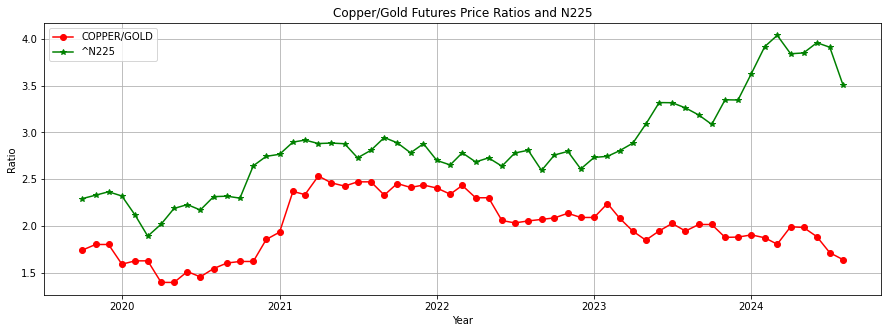

In [163]:
_ = plt.figure(figsize = (15, 5))
_ = plt.plot(data["COPPER/GOLD"] * 1000, "ro-", label = "COPPER/GOLD")
_ = plt.plot(data["^N225"] / 10000, "g*-", label = "^N225")
_ = plt.legend()
_ = plt.xlabel("Year")
_ = plt.ylabel("Ratio")
_ = plt.title("Copper/Gold Futures Price Ratios and N225")
_ = plt.grid()

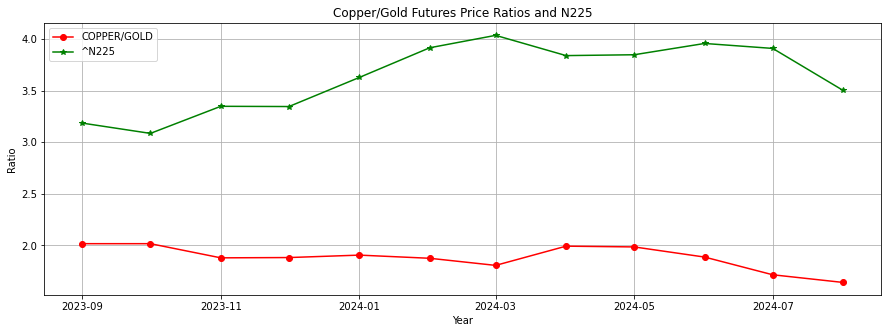

In [164]:
_ = plt.figure(figsize = (15, 5))
_ = plt.plot((data["COPPER/GOLD"] * 1000)[-12:], "ro-", label = "COPPER/GOLD")
_ = plt.plot((data["^N225"] / 10000)[-12:], "g*-", label = "^N225")
_ = plt.legend()
_ = plt.xlabel("Year")
_ = plt.ylabel("Ratio")
_ = plt.title("Copper/Gold Futures Price Ratios and N225")
_ = plt.grid()

In [245]:
len(data)

59

In [281]:
import statsmodels.api as sm
from statsmodels.tsa.ardl import ARDL

# Assuming data1 and data2 are your time series
# Lag orders can be chosen based on criteria like AIC, BIC, or using predefined lags

# Example with lag orders p=1 and q=1
model = ARDL(data["^N225"].head(50), 
             [1], 
             data[["COPPER/GOLD"]].head(50), 
             [10], 
             trend = "ct", 
            )
result = model.fit()

print(result.summary())
 

                              ARDL Model Results                              
Dep. Variable:                  ^N225   No. Observations:                   50
Model:                    ARDL(1, 10)   Log Likelihood                -402.278
Method:               Conditional MLE   S.D. of innovations            889.637
Date:                Sun, 11 Aug 2024   AIC                            814.556
Time:                        07:17:55   BIC                            824.015
Sample:                    08-01-2020   HQIC                           818.145
                         - 11-01-2023                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.532e+04   3283.107      4.665      0.000    8703.243    2.19e+04
trend             113.6033     29.462      3.856      0.000      54.264     172.943
^N225.L1            0.5342      

In [283]:
# Example with lag orders p=1 and q=1
model = ARDL(data["^N225"].head(50), 
             [1], 
             data[["COPPER/GOLD"]].head(50), 
             [7], 
             trend = "ct", 
            )
result = model.fit()

print(result.summary())

                              ARDL Model Results                              
Dep. Variable:                  ^N225   No. Observations:                   50
Model:                     ARDL(1, 7)   Log Likelihood                -407.654
Method:               Conditional MLE   S.D. of innovations            992.796
Date:                Sun, 11 Aug 2024   AIC                            825.307
Time:                        07:18:17   BIC                            834.767
Sample:                    05-01-2020   HQIC                           828.896
                         - 11-01-2023                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8442.1967   2322.117      3.636      0.001    3765.214    1.31e+04
trend             62.0092     23.286      2.663      0.011      15.108     108.910
^N225.L1           0.7526      0.085